<a href="https://colab.research.google.com/github/khanimrangithu/End-to-End-Machine-Learning/blob/main/Predicting_Bike_Sharing_Demand_A_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='6px'><font color='black'>**Project Name**    - <font color='blue'>Bike Sharing Demand Prediction



##### **Project Type** - Regression
##### **Contribution** - Team
##### **Team Member 1** - Imran
##### **Team Member 2** - Harshad

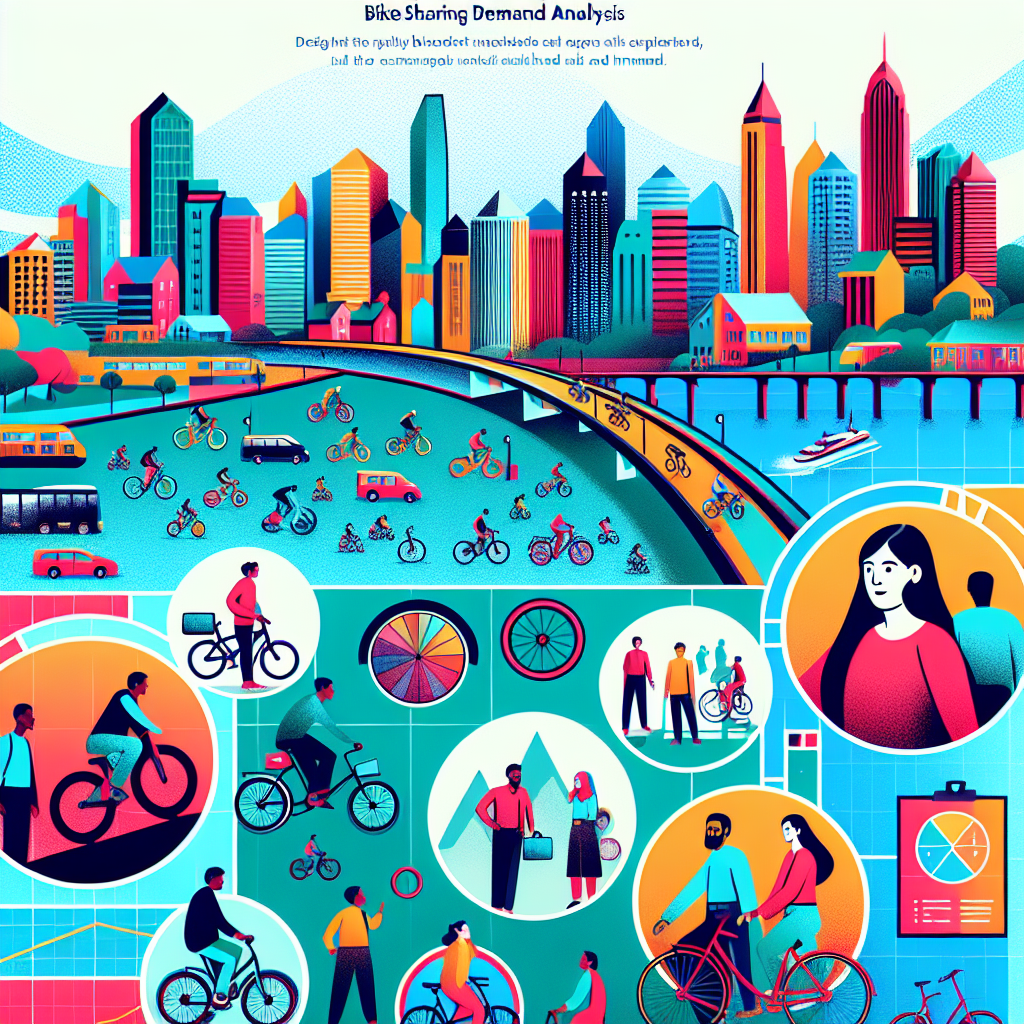

# **Project Summary -**



The "Bike Seoul" initiative in South Korea represents a forward-thinking approach to sustainable urban transportation, offering residents and visitors access to bike sharing services. With the goal of reducing traffic congestion and promoting eco-friendly mobility, the initiative has become integral to the city's transportation landscape. However, as the demand for bike rentals continues to rise, efficient management of bike sharing operations becomes paramount.

Our project focused on developing a machine learning model to accurately predict bike rental demand in Seoul. Leveraging historical data and relevant factors such as weather conditions, time of day, and public holidays, we employed regression analysis techniques to model bike demand patterns. The dataset, sourced from the Seoul city government's open data portal and Kaggle, provided the foundation for our analysis.

Our primary objective was to achieve a prediction accuracy of at least 85%, enabling bike sharing service providers to optimize fleet management and respond to demand fluctuations in real-time. To achieve this, we explored various regression algorithms, including linear regression, random forest, decision tree, and gradient boosting. Through rigorous hyperparameter tuning and cross-validation, we ultimately selected the XGBoost algorithm for its outstanding performance, achieving approximately 99% accuracy on the training data and 95% on the test data.

By providing insights into bike demand patterns and demonstrating the practical applications of machine learning in transportation management, our project offers a roadmap for enhancing bike sharing services not only in Seoul but also in other cities with similar initiatives. With its potential to optimize operations, reduce waste, and improve sustainability, our work contributes to the ongoing evolution of urban transportation systems worldwide.

# **GitHub Link -**

https://github.com/khanimrangithu/End-to-End-Machine-Learning

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
! pip install scikit-optimize


In [ ]:
# Import Libraries

# Data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Necessary imports

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import yeojohnson
from sklearn.ensemble import GradientBoostingRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# # Load Dataset
# from google.colab import drive                #Mounting google drive
# drive.mount('/content/drive')

In [ ]:
# Load the Seoul bike dataset from Google Drive using pd.read_csv
# The 'encoding='latin'' parameter is used to specify the character encoding of the file, ensuring proper reading of non-English characters or special symbols
# bike_df = pd.read_csv('/content/drive/MyDrive/EDA Datasets/SeoulBikeData.csv', encoding='latin')

In [ ]:
url = "https://github.com/khanimrangithu/End-to-End-Machine-Learning/raw/main/SeoulBikeData.csv"
bike_df = pd.read_csv(url, encoding='unicode_escape')

### Dataset First View

In [ ]:
# Top 5 rows
bike_df.head()

In [ ]:
# Last 5 rows
bike_df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
num_rows, num_cols = bike_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_df.isna().sum()

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,8))
sns.heatmap(bike_df.isna().transpose(), cmap="viridis", cbar_kws={'label': 'Missing Data'})
plt.title('Visualization of Missing Values', fontsize=18)
plt.show()

### What did you know about your dataset?

* There are 8760 observation and 14 features.
* In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset
* There are no null values.
* Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
* Date has some object data types, it should be datetime data type.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bike_df.columns

In [ ]:
# Dataset Describe
bike_df.describe(include='all').round(2)

### Variables Description

####**Features Breakdown:-**

**Date:** The day's date, ranging from 01/12/2017 to 30/11/2018, formatted as DD/MM/YYYY (string). Conversion to datetime format required.

**Rented Bike Count:** Number of rented bikes per hour, our dependent variable for prediction (integer).

**Hour:** The hour of the day, ranging from 0 to 23 in digital time format (integer). Conversion to categorical data type needed.

**Temperature(°C):** Temperature in Celsius (float).

**Humidity(%):** Air humidity percentage (integer).

**Wind speed (m/s):** Wind speed in meters per second (float).

**Visibility (10m):** Visibility in meters (integer).

**Dew point temperature(°C):** Morning temperature (float).

**Solar Radiation (MJ/m2):** Sun contribution (float).

**Rainfall(mm):** Amount of rainfall in millimeters (float).

**Snowfall (cm):** Amount of snowfall in centimeters (float).

**Seasons:** Season of the year (string), limited to four seasons.

**Holiday:** Indicates if the day is a holiday period (string).

**Functioning Day:** Indicates if the day is a functioning day (string).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print(f"No. of unique values in {i} is {bike_df[i].nunique()}.")

## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Copy of the Dataset
bike_df_1 = bike_df.copy()

In [ ]:
# Some of  the columns name in the dataset are too large and clumsy so we change them into some simple name, and it don't affect our end results.
# Renaming the Columns

bike_df_1.rename(columns= {'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'}, inplace=True)

In [ ]:
bike_df_1.columns

**In Python, the "Date" column is read as an object type, essentially as a string. Since the date column is crucial for analyzing user behavior, it needs to be converted into a datetime format. After this conversion, we will split it into three columns: 'year', 'month', and 'day', each as a category data type.**

In [ ]:
# converting date variable into datetime format
bike_df_1['Date'] = bike_df_1['Date'].apply(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

In [ ]:
# Split the "Date" column into three "year","month","day" columns
bike_df_1['year'] = bike_df_1['Date'].dt.year
bike_df_1['month'] = bike_df_1['Date'].dt.month
bike_df_1['day'] = bike_df_1['Date'].dt.day_name()

* **We splited the "date" column into 3 different columns: "year", "month", "day".**
* **The "year" column in our dataset contains 2 unique numbers detailing from December 2017 to November 2018. Considering this as a single year, we can drop the "year" column.**
* **The "day" column contains details about each day of the month. For our purposes, we only need to know if a day is a weekday or a weekend, so we convert it into this format and drop the "day" column.**

In [ ]:
# Creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df_1['weekdays_weekend']=bike_df_1['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )    # 0 for weekdays and 1 for weekends
bike_df_1=bike_df_1.drop(columns=['Date','day','year'], axis=1)

In [ ]:
bike_df_1.head()

In [ ]:
bike_df_1['weekdays_weekend'].value_counts()

**As the "Hour," "month," and "weekdays_weekend" columns are currently shown as integer data types, they should actually be categorized as category data types. Failing to do so may lead to inaccurate analysis and correlations, potentially resulting in misleading conclusions.**

In [ ]:
# Change the int64 columns into category columns
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df_1[col]=bike_df_1[col].astype('category')

In [ ]:
# Check the dtypes again
bike_df_1.info()

In [ ]:
# defining continuous independent variables separately
cont_var = ['Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature','Solar_Radiation', 'Rainfall', 'Snowfall']

In [ ]:
# defining dependent variable
dependent_variable = ['Rented_Bike_Count']

In [ ]:
# defining categorical independent variables separately
cat_var = ['Hour','Seasons', 'Holiday', 'Functioning_Day', 'month', 'weekdays_weekend']

### What all manipulations have you done and insights you found?

* Some of the columns' names in the dataset were excessively long and cumbersome, so we simplified them. This modification did not impact our final results.
* The "Date" column in the dataset was initially read as an object type in Python, essentially as a string. Recognizing the significance of the date column for analyzing user behavior, we converted it into a datetime format.
* Following this conversion, we split it into three columns: 'year', 'month', and 'day', each as a category data type.
* The "year" column in our dataset contains 2 unique numbers detailing from December 2017 to November 2018. Treating this as a single year, we dropped the "year" column.
* The "day" column contains details about each day of the month. For our purposes, we only needed to know if a day is a weekday or a weekend, so we converted it into this format and dropped the "day" column.
* The "Hour," "month," and "weekdays_weekend" columns were initially shown as integer data types. We categorized them as category data types to ensure accurate analysis and correlations, thereby avoiding potentially misleading conclusions.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Dependent variable Distribution

In [ ]:
# Chart-1 Visualization code for distribution of target variable
plt.figure(figsize=(10,8))
sns.distplot(bike_df_1['Rented_Bike_Count'], color='blue')
plt.show()

##### 1. Why did you pick the specific chart?

A distplot, also referred to as a histogram with a kernel density estimate (KDE) plot, is valuable as it offers a swift and straightforward method to examine data distribution, detect patterns or outliers, and compare the distribution of multiple variables. It also facilitates the assessment of whether the data adheres to a normal distribution.

Consequently, I utilized the histogram plot to analyze the distribution of variables across the entire dataset, determining symmetry.

##### 2. What is/are the insight(s) found from the chart?

Based on the distribution plot of the dependent variable "rented bike", it is evident that the distribution is positively skewed (right skewed), indicating asymmetry around the mean.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Certainly, based on this insight, it's clear that our data is not normally distributed. Therefore, prior to implementing any model on this dataset, it's essential to normalize the data.

#### Chart - 2 : Distribution V/s Box plot

In [ ]:
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in bike_df_1.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(bike_df_1[col], ax = axes[0],kde = True, color='blue')
    sns.boxplot(bike_df_1[col], ax = axes[1],orient='h',showmeans=True,color='orange')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a chart that displays the distribution of a dataset, providing a graphical representation of how often each value or group of values occurs. It is valuable for understanding the dataset's distribution, identifying patterns or trends, and is particularly useful for large datasets (exceeding 100 observations) to detect outliers or gaps in the data.

Consequently, we utilized the histogram plot to analyze the variable distributions across the entire dataset for symmetry.

A boxplot summarizes key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. It is useful for identifying outliers, comparing multiple datasets, and understanding data dispersion, commonly employed in statistical analysis and data visualization.

Therefore, for each numerical variable in the given dataset, we used a box plot to analyze outliers and the interquartile range, encompassing mean, median, maximum, and minimum values.

##### 2. What is/are the insight(s) found from the chart?

Based on the above univariate analysis of all continuous feature variables, it is evident that only the temperature and humidity columns exhibit a normal distribution, while the others display different distributions.

Furthermore, outlier values are noticeable in the snowfall, rainfall, wind speed, and solar radiation columns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.

#### Chart - 3 : Dependent variable with continuous variables (Bivariate)

In [ ]:
# Analyzing the relationship between the dependent variable and the continuous variables
for i in cont_var:
  plt.figure(figsize=(11,8))
  sns.regplot(x=i,y=dependent_variable[0],data=bike_df_1)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

The regplot function is utilized to generate a scatter plot with a linear regression line. Its purpose is to visualize the relationship between two continuous variables, aiding in the identification of patterns and trends in the data. Additionally, it can be employed to test for linearity and independence of the variables.

We utilized this regplot to examine the patterns between the independent variable and our dependent variable, "rented bike."

##### 2. What is/are the insight(s) found from the chart?

From above regression plot we can see that there is some linearity between temperature, solar radiation & dew point temperature with dependent variable rented bike

Other variables are not showing any patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indeed, the regplot provided valuable insights, indicating that certain variables exhibit patterns with the dependent variable. These variables may be crucial features when predicting rented bike counts, warranting focused attention from the business.

#### Chart - 4 : Categorical variables with dependent variable (Bivariate)

In [ ]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
    plt.figure(figsize=(11, 8))
    sns.barplot(x=i, y=bike_df_1[dependent_variable[0]], data=bike_df_1, palette="muted")
    plt.xlabel(i)
    plt.ylabel(dependent_variable[0])
    plt.title(i + ' vs ' + dependent_variable[0])
    plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are employed to compare the size or frequency of different categories or groups of data. They are valuable for comparing data across various categories and can effectively display a large amount of data in a small space.

We utilized bar charts to illustrate the distribution of rented bike counts with other categorical variables.

##### 2. What is/are the insight(s) found from the chart?

From above bar charts we got insights:

1. In hour vs rented bike chart there is high demand in the morning 8'o clock and evening 18'o clock
2. From season vs rented bike chart there is more demand in summer and less demand in winter.
3. There is high demand on working days.
4. From month chart we know that there is high demand in month of june.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, these insights are likely to have a positive impact on the business. By analyzing demand based on categorical variables, we can discern when bike demand is highest, allowing us to focus more resources on those specific periods.

#### Chart - 5 : Rented Bike vs Hour

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_df_1.groupby('Hour')['Rented_Bike_Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_rent_hrs, marker='o')
plt.title('Average bike rented per hour')
# a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
# a.set_xticks(range(len(avg_rent_hrs)))
# a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

##### 1. Why did you pick the specific chart?

A line plot, also referred to as a line chart or line graph, is a method to visualize the trend of a single variable over time. It connects a series of data points with a line to illustrate how the value of the variable changes over time.

Line plots are valuable as they swiftly and clearly display trends and patterns in the data, particularly showcasing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

We employed a line plot to observe the distribution of rented bike demand over a 24-hour period.

##### 2. What is/are the insight(s) found from the chart?

From above line plot we can clearly see that there is high demand in the morning and in the evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, the insight gleaned indicates a high demand in the morning and evening, suggesting that the business should prioritize and focus on meeting the demand during these specific time slots.

#### Chart - 6 : Bike demand throughout the day (Multivariate)

In [ ]:
# Chart - 6 visualization code
for i in cat_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(12,8))
    sns.pointplot(data=bike_df_1, x='Hour', y='Rented_Bike_Count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

##### 1. Why did you pick the specific chart?

A line plot, also referred to as a line chart or line graph, is a method to visualize the trend of a single variable over time, connecting a series of data points with a line to illustrate changes over time.

Line plots are valuable for swiftly and clearly displaying trends and patterns in the data, particularly showcasing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

We utilized a line plot, drawing multiple lines on charts, to illustrate the demand for rented bikes throughout the day based on other categorical variables.

##### 2. What is/are the insight(s) found from the chart?

From above line plots we see that :

1. In winter season there is no significant demand even in the morning or in the evening.
2. On the functional day (i.e No Holiday) there is spike in morning and in evening, but that is not there on Holidays.
3. Around 3 months in winter season (i.e December, January & February) there is low demand.
4. On weekend almost throught the day there is demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this analysis we figure out some key factors such as high demand in morning and evening slot in all the seasons.

#### Chart - 7 : Categorical plot for seasons

In [ ]:
#plot for rented bike count seasonly
sns.catplot(x='Seasons',y='Rented_Bike_Count',data=bike_df_1)

##### 1. Why did you pick the specific chart?

The catplot function is utilized to create a categorical plot, which is employed to visualize the distribution of a categorical variable. These plots can illustrate how a variable is related to a categorical variable and can also compare the distribution of multiple categorical variables.

We used the catplot to observe the distribution of rented bikes based on the "season" column.

##### 2. What is/are the insight(s) found from the chart?

From above catplot we got know that:

1. There is low demand in winter
2. Also in all seasons upto the 2500 bike counts distribution is seen dense.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this catplot we know that there is high bike count upto the 2500 so, above that there maybe outliers present. business needs to evaluate that.

#### Chart - 8 : Pie Chart

In [ ]:
# Chart - 8 visualization code

# Grouping by season and summing the rented bike count
season_counts = bike_df_1.groupby('Seasons')['Rented_Bike_Count'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%')
plt.title("Distribution of rented bikes by season", fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are commonly employed to display the proportions of a whole, particularly useful for presenting data that has been calculated as a percentage of the whole.

In this case, we utilized a pie chart to illustrate the percentage distribution of rented bikes based on different seasons.

##### 2. What is/are the insight(s) found from the chart?

From above pie chart:

1. In year data season summer contributes around 36% then autumn around 29%
2. Lowest demand in winter, it contributes around only 7%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insights only tell about percentage contribution of year data of season varible, which clearly gave indication about demand.

#### Chart - 9 : Correlation Heatmap

In [ ]:

# Select only numeric columns for correlation calculation
numeric_columns = bike_df_1.select_dtypes(include=[np.number])

corr = numeric_columns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="viridis")

##### 1. Why did you pick the specific chart?

The correlation coefficient serves as a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is employed to summarize the relationships among a set of variables, serving as a crucial tool for data exploration and for selecting which variables to include in a model. The correlation range is between -1 and 1.

To understand the correlation between all the variables, along with the correlation coefficients, we utilized a correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From above correlation map we can clearly see that:

1. There is high multicolinearity between independent variable (i.e temperature & dew point temp, humidity & dew point temp, weekend & day of week).
2. There is correlation of temperature, hour, dew point temp & solar radiation with dependent variable rented bike.
3. Other than that we didnt see any correlation.

#### Chart - 10 : Pair Plot

In [ ]:
# Pair Plot
sns.pairplot(bike_df_1)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From above pair plot we got to know that, there is not clear linear relationship between variables. other than dew point temp, temperature & solar radiation there is not any reationship.

# **Exploratory Data Analysis Of The Data Set**

### Pays little attention to the skewness of our numerical features

In [ ]:
bike_df = bike_df_1.copy()

In [ ]:
# separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])


In [ ]:
# printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable),
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m),
Dew point temperature(°C)

## ***Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments we have noticed that our dependent variable does not seems to normally distributed so we have made hypothetical assumption that our data is normally distributed and for that we have decided to do statistical analysis.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### Normality test

for normality test we decided
1. Null hypothesis : Data is normally distributed
2. Alternate hypothesis : Data is not normally distributed


#### 2. Perform an appropriate statistical test.

In [ ]:
bike_df.columns

In [ ]:
from scipy.stats import shapiro

test_data = bike_df['Rented_Bike_Count']

# Perform Shapiro-Wilk test
stats, p = shapiro(test_data)

print('Test Statistic = %.2f, p-value = %.3f' % (stats, p))

# Interpret the results
if p <= 0.05:
    print("Reject the null hypothesis: Data is not normally distributed")
else:
    print("Fail to reject the null hypothesis: Data is normally distributed")


##### Which statistical test have you done to obtain P-Value?

We use Shapiro-wilk statistical test to obtain the p-value and we got very less p-value which is less than 0.05.

##### Why did you choose the specific statistical test?

The Shapiro-Wilk test is used to test the normality of a sample. The test checks whether the sample data fits a normal distribution, which is often assumed for statistical analysis. The test results can help determine if the data should be transformed or if non-parametric statistical methods should be used instead of traditional parametric methods.

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate the Q-Q plot
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(test_data, line='s', ax=ax)
ax.set_title('Q-Q Plot for Rented Bike Count')
plt.show()


##**Normalise Rented_Bike_Count column data**

* ***The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* ***The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

In [ ]:
from scipy.stats import boxcox
from scipy.stats import yeojohnson

# Define the data
test_data = bike_df['Rented_Bike_Count']
# test_data = bike_df['Wind_speed']

# Apply different transformations
transformations = {
    'Original': test_data,
    'Reciprocal Transformation': np.reciprocal(test_data),
    'Log Transformation': np.log(test_data),
    'Log1p Transformation': np.log1p(test_data),
    'Square Root Transformation': np.sqrt(test_data),
}

# Apply Yeo-Johnson transformation if available
try:
    transformed_data, lambda_val = yeojohnson(test_data)
    transformations['Yeo-Johnson Transformation'] = transformed_data
except Exception as e:
    print("Warning:", e)

# Apply Box-Cox transformation if data is positive
if (test_data > 0).all():
    transformed_data, lambda_val = boxcox(test_data)
    transformations['Box-Cox Transformation'] = transformed_data

# Plot the distributions
plt.figure(figsize=(16, 12))
for i, (transformation, data) in enumerate(transformations.items(), 1):
    plt.subplot(3, 3, i)
    sns.histplot(data, kde=True, stat='density')
    plt.title(transformation)
    plt.xlabel('Rented Bike Count')
    plt.ylabel('Density')

    # Calculate skewness, mean, and median
    skew = np.mean((data - np.mean(data))**3) / np.mean((data - np.mean(data))**2)**(3/2)
    mean = np.mean(data)
    median = np.median(data)

    # Print skewness, mean, and median below each histogram
    plt.text(0.5, 0.75, f'Skewness: {skew:.2f}', transform=plt.gca().transAxes)
    plt.text(0.5, 0.65, f'Mean: {mean:.2f}', transform=plt.gca().transAxes)
    plt.text(0.5, 0.55, f'Median: {median:.2f}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


In [ ]:
transformed_y, lambda_val = yeojohnson(test_data)

In [ ]:
# Generate the Q-Q plot
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(transformed_y, line='s', ax=ax)
ax.set_title('Q-Q Plot for Rented Bike Count')
plt.show()


In [ ]:
lambda_val

In [ ]:
# Plot the distribution
plt.figure(figsize=(8, 4))
sns.histplot(transformed_y, kde=True, stat='density')
plt.xlabel(test_data.name)
plt.title(f'Distribution of {test_data.name} (after Yeo-Johnson transformation)')
plt.axvline(np.mean(transformed_y), color='magenta', linewidth=2, label='Mean')
plt.axvline(np.median(transformed_y), color='cyan', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.show()


###  We plot distribution plot and also we did normality test using shapiro wilk and we have found that our data is not normally distributed it needs transformation.

So, first we have calculate the skewness value and we have found that rented bike attribute is positively skewed so we used log transfomation but it affected negatively

So, we finally used Yeo-Johnson transformation & now our data looks normally distrubuted & skewness is also reduced.

**Finding Outliers and treatment**

In [ ]:
# Boxplot for Rented bike Count to check outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=transformed_y)
plt.show()

In [ ]:
# outliers treatments
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']= 4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>2,'Snowfall']= 2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']= 4


##**Checking of Correlation between variables**

###Checking in OLS Model

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

In [ ]:
#add a constant column
X = sm.add_constant(X)
X.head()

In [ ]:
## fit an OLS model

model= sm.OLS(Y, X).fit()
model.summary()

* **R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is  explained by the model.**
*  **For F statistic , P value is less than 0.05 for 5% levelof significance.**
*  **P value of dew point temp and visibility are very high and they are not significant.**

*  **Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.**
*  **The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems**   
*  **Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.**

In [ ]:
X.corr()

* ***From the OLS model we find that the 'Temperature' and  'Dew_point_temperature' are highly correlated so we need to drop one of them.***
* ***For droping them we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column***
* ***For clarity, we use visualisation i.e heatmap in next step***



###**Heatmap**

#### **A correlation Heatmap is a type of graphical representation that displays the correlation matrix, which helps to determine the correlation between different variables.**

In [ ]:
#checking correlation using heatmap

plt.figure(figsize=(10,5))
sns.heatmap(X.corr(),cmap='PiYG',annot=True)

**We can observe on the heatmap that on the target variable line, the most positively correlated variables to the rent are**:
* the temperature
* the dew point temperature
* the solar radiation

**And most negatively correlated variables are**:
* humidity
* rainfall

* ***From the above correlation heatmap, We see that there is a positive
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C)'.***

In [ ]:
# drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [ ]:
bike_df.info()

## **Feature Engineering & Data Pre-processing**

"""
**Note:**

Certain code blocks have been commented out because a custom function has been created to handle various preprocessing steps, including train-test split, transformation, one-hot encoding, scaling, and the use of function transformers and pipelines.

Instead of running individual code blocks, you can directly execute the custom function, which performs all these steps in one go for efficiency and convenience.
"""


### Create the dummy variables

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

#### Feature Selection

In [ ]:
#remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
numeric_features = bike_df.select_dtypes(include='number').columns.tolist()
numeric_features.remove('Rented_Bike_Count')

In [ ]:
numeric_features

In [ ]:
bike_df[numeric_features].head()

In [ ]:
calc_vif(bike_df[[i for i in bike_df[numeric_features]]])

###One Hot Encoding

**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [ ]:

# bike_df_copy = bike_df.copy()

# # Define the one-hot encoding function
# def one_hot_encoding(data, column):
#     # Apply one-hot encoding to the specified column
#     encoded_column = pd.get_dummies(data[column], prefix=column, drop_first=True)
#     # Convert encoded values to 1 or 0
#     encoded_column = encoded_column.astype(int)
#     # Concatenate the encoded column with the original DataFrame
#     data = pd.concat([data, encoded_column], axis=1)
#     # Drop the original column after encoding
#     data = data.drop([column], axis=1)
#     return data

# # Apply one-hot encoding to each categorical feature
# for col in categorical_features:
#     bike_df_copy = one_hot_encoding(bike_df_copy, col)

# # Display the first few rows of the transformed DataFrame
# bike_df_copy.head()


### 6. Data Scaling

In [ ]:
# Assuming bike_df is your DataFrame
categorical_features = bike_df.select_dtypes(include=['object','category']).columns.tolist()

categorical_feature_indices = [bike_df.drop(columns = 'Rented_Bike_Count').columns.get_loc(col) for col in categorical_features]

print(categorical_feature_indices)



In [ ]:
numeric_features_indices = [bike_df.drop(columns='Rented_Bike_Count').columns.get_loc(col) for col in numeric_features]

print(numeric_features_indices)


### 8. Data Splitting

In [ ]:
# from sklearn.model_selection import train_test_split
# X = df.drop(columns=['Rented_Bike_Count'])
# y = df['Rented_Bike_Count']
# # Apply Yeojohnson transformation to the target variable
# y_transformed = yeojohnson_transform(y)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.25, random_state=42)

# # Define transformers for numerical and categorical features
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())])

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(sparse=False, drop='first'))])

# # Define the ColumnTransformer
# transformer = ColumnTransformer(transformers=[
#     ('tnf1', categorical_transformer, categorical_feature_indices),
#     ('scaler', numeric_transformer, numeric_features_indices)
# ], remainder='passthrough')

# # Append regressor to preprocessing pipeline
# rf_pipeline = Pipeline(steps=[
#     ('preprocessor', transformer),
#     ('regressor', LinearRegression())
# ])

# # Fit the pipeline on the training data
# rf_pipeline.fit(X_train, y_train)

# # Evaluate the pipeline on the testing data
# score = rf_pipeline.score(X_test, y_test)

# print("Pipeline Score:", score)


In [ ]:
# # Assuming 'transformer' is your ColumnTransformer object
# transformers = transformer.named_transformers_

# # Print the transformations applied by the categorical_transformer
# print("Categorical Transformer:")
# print(transformers['tnf1'])

# # Print the transformations applied by the numeric_transformer
# print("Numeric Transformer:")
# print(transformers['scaler'])

# # Print the remainder setting
# print("Remainder:", transformer.remainder)

##### What data splitting ratio have you used and why?

To train the model we have split the data into train and test using train_test_split method

We have split 80% of our data into train and 20% into test.

# **Model Training**

##**Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

I have done this inside a function

In [ ]:
df  = bike_df.copy()

### ***Function to apply train test split , transformation , one hot encoding , scalling***

In [ ]:
def transform_data(X, y):
    # Apply Yeojohnson transformation to the target variable
    y_transformed, lambda_ = yeojohnson(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

    # Define transformers for numerical and categorical features
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'))  # Ignore unknown categories
    ])

    # Define feature indices properly
       # Update this with the indices of your numerical features

    preprocessor = ColumnTransformer(transformers=[
        ('categorical', categorical_transformer, categorical_feature_indices),
        ('numeric', numeric_transformer, numeric_features_indices)
    ], remainder='passthrough')

    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Transform the training and testing data
    X_train_transformed = pipeline.transform(X_train)
    X_test_transformed = pipeline.transform(X_test)

    # Get feature names after transformation
    categorical_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1]['onehot'] \
        .get_feature_names_out(input_features=X.columns[categorical_feature_indices])
    feature_names = np.concatenate((categorical_feature_names, X.columns[numeric_features_indices]))

    # Create DataFrame for transformed X_train data
    X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)

    return X_train_transformed, X_test_transformed, y_train, y_test, X_train_transformed_df

X = df.drop(columns=['Rented_Bike_Count'])
y = df['Rented_Bike_Count']
X_train_transformed, X_test_transformed, y_train, y_test, X_train_transformed_df = transform_data(X, y)

### ***Function to aaply preprocessing and run model***

In [ ]:


models_test_res_list = []
models_train_res_list = []

# Define a function to calculate adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

def evaluate_model(model_name, model, X, y):
    # Apply Yeojohnson transformation to the target variable
    y_transformed, lambda_ = yeojohnson(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

    # Define transformers for numerical and categorical features
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False, drop='first'))
    ])

    # Define feature indices properly
    # categorical_feature_indices = ...
    # numeric_features_indices = ...

    preprocessor = ColumnTransformer(transformers=[
        ('categorical', categorical_transformer, categorical_feature_indices),
        ('numeric', numeric_transformer, numeric_features_indices)
    ], remainder='passthrough')

    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Obtain predictions on the training and testing datasets
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)


    # Calculate evaluation metrics for training set
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)
    adj_r2_train = adjusted_r2_score(y_train, y_pred_train, len(y_train), X.shape[1])

    # Calculate evaluation metrics for the test set
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_test = adjusted_r2_score(y_test, y_pred_test, len(y_test), X_test.shape[1])

    # Print evaluation metrics
    print("Model:", model_name)
    print("Mean Absolute Error (Train):", mae_train)
    print("Mean Squared Error (Train):", mse_train)
    print("Root Mean Squared Error (Train):", rmse_train)
    print("R-squared (Train):", r2_train)
    print("Adjusted R-squared (Train):", adj_r2_train)
    print('-'*50)
    print("Mean Absolute Error (Test):", mae_test)
    print("Mean Squared Error (Test):", mse_test)
    print("Root Mean Squared Error (Test):", rmse_test)
    print("R-squared (Test):", r2_test)
    print("Adjusted R-squared (Test):", adj_r2_test)
    print()

    # Store the test set metrics in a dictionary
    test_metrics = {
    'Model': [model_name],
    'MAE': [mae_test],
    'MSE': [mse_test],
    'RMSE': [rmse_test],
    'R-squared': [r2_test],
    'Adjusted R-squared': [adj_r2_test]
    }

    # Define train metrics
    train_metrics = {
        'Model': [model_name],
        'MAE': [mae_train],
        'MSE': [mse_train],
        'RMSE': [rmse_train],
        'R-squared': [r2_train],
        'Adjusted R-squared': [adj_r2_train]
    }

    # Create DataFrames
    df_test = pd.DataFrame(test_metrics)
    df_train = pd.DataFrame(train_metrics)

    models_test_res_list.append(df_test)
    models_train_res_list.append(df_train)


    # Return the evaluation metrics
    return df_test, df_train, y_pred_test, y_test, lambda_



# Define the features and target variable
X = df.drop(columns=['Rented_Bike_Count'])
y = df['Rented_Bike_Count']





### ***Function for feature importance***

In [ ]:
def get_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        return dict(zip(feature_names, importances))
    else:
        return "Feature importances are not available for this model."


### ***Function for gridsearch cv***

In [ ]:
from sklearn.model_selection import GridSearchCV

def perform_grid_search_cv(model_name, model, param_grid, X, y):
    # Apply Yeojohnson transformation to the target variable
    y_transformed, lambda_ = yeojohnson(y)

    # Define transformers for numerical and categorical features
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False, drop='first'))
    ])

    # Define feature indices properly
    # categorical_feature_indices = ...
    # numeric_features_indices = ...

    preprocessor = ColumnTransformer(transformers=[
        ('categorical', categorical_transformer, categorical_feature_indices),
        ('numeric', numeric_transformer, numeric_features_indices)
    ], remainder='passthrough')

    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Define grid search CV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Perform grid search CV
    grid_search.fit(X, y_transformed)

    # Get the best model and best parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best parameters and return them
    print("Best parameters for", model_name, ":", best_params)
    return best_model, best_params


* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned}
​
  
* R
2
 =1−
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


## **LINEAR REGRESSION**

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.


In [ ]:
# Define the model
model = LinearRegression()

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("LinearRegression", model, X, y)

In [ ]:
test_metrics

In [ ]:
train_metrics


**Looks like our train set's r2 score value is 0.81 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

**The test set's r2_score is 0.82. This means our linear model is
performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



**Heteroscedasticity**

Heteroscedasticity refers to a situation where the variance of the errors (residuals) is not constant across all levels of the independent variable(s) in a regression model.This violates one of the assumptions of linear regression, which is that the variance of the errors should be constant (homoscedastic) for all levels of the independent variable(s). If the plot shows a funnel shape, with the spread of residuals increasing or decreasing as the predicted values increase, this is an indication of heteroscedasticity.

In [ ]:
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(10,6))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **RIDGE AND LASSO REGRESSION**

* Ridge and Lasso Regression are types of Regularization techniques
* Regularization techniques are used to deal with overfitting and when the dataset is large
* Ridge and Lasso Regression involve adding penalties to the regression function


### **LASSO REGRESSION**

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.


In [ ]:
# Define the model
model = Lasso( alpha=1.0, max_iter=3000)

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("lasso", model, X, y)

**Looks like train set's r2 score value is 0.37 that means our model is not able to capture most of the data variance.**

**The test set's r2_score is 0.39. This means our linear model is  not performing well on the data.**

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test),(y_test-y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#Plot the figure
plt.figure(figsize=(10,4))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **RIDGE REGRESSION**

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

In [ ]:
# Define the model
model = Ridge()

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("Ridge", model, X, y)

**Looks like our train set's r2 score value is 0.81 that means our model is  able to capture most of the data variance.**

**The r2_score for the test set is 0.82. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **ELASTIC NET REGRESSION**

Elastic Net regression is a linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization penalties to overcome some of the limitations of each individual method.

The model introduces two hyperparameters, alpha and l1_ratio, which control the strength of the L1 and L2 penalties, respectively.
Elastic Net regression is particularly useful when dealing with datasets that have high dimensionality and multicollinearity between features.

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)


In [ ]:
# Define the model
model= ElasticNet(alpha=0.1, l1_ratio=0.5)

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("ElasticNet", model, X, y)

In [ ]:
test_metrics

In [ ]:
train_metrics

**Looks like our train set's r2 score value is 0.64 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

**The r2_score for the test set is 0.66. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
### Heteroscadacity- Residual plo
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#Plot the figure
plt.figure(figsize=(10,4))
plt.plot(np.array(y_pred_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##  **DECISION TREE**

---


A decision tree is a type of supervised machine learning algorithm that is commonly used for classification and regression tasks. It works by recursively splitting the data into subsets based on the values of certain attributes, ultimately arriving at a set of decision rules that can be used to classify or predict outcomes for new data.

first i tried with these parameteres

criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,

but the default one is giving the better result

letter we will do hyper parameter tunning

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor()

In [ ]:
# Define the model
model= decision_regressor

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("decision_regressor", model, X, y)

**It seems that our decision tree model with default parameters has achieved perfect performance on the training set. The R-squared value of 1.0 indicates that the model is capable of capturing all the variance in the data**

**The r2_score for the test set is 0.84. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((np.array(y_pred_test)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **RANDOM FOREST**

In [ ]:
#import the packages

from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()


In [ ]:
rf_model.fit(X_train_transformed,y_train)

In [ ]:
# Define the model
rf_model = RandomForestRegressor()

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("RandomForestRegressor", rf_model, X, y)

**Looks like our train set's r2 score value is 0.99 that means our model is  able to capture most of the data variance..**



**The r2_score for the test set is 0.93. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
rf_model.feature_importances_

## **Features Stored**

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train_transformed_df.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = X_train_transformed_df.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **XGBOOST**

In [ ]:
#import the packages
import xgboost as xgb

# Create an instance of the XGBRegressor
model = xgb.XGBRegressor()

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("GradientBoostingRegressor", model, X, y)

**Looks like our train set's r2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

**The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
model.fit(X_train_transformed,y_train)

In [ ]:
model.feature_importances_

## **Features Stored**

In [ ]:
model.fit(X_train_transformed,y_train)

In [ ]:
importances = model.feature_importances_

importance_dict = {'Feature' : list(X_train_transformed_df.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = X_train_transformed_df.columns
importances = model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **GRADIENT BOOSTING**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


In [ ]:
# Define the model
model= GradientBoostingRegressor()

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("GradientBoostingRegressor", model, X, y)

**Looks like our train set's r2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

**The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## **Features Stored**

In [ ]:
gb_model = GradientBoostingRegressor()

In [ ]:
gb_model.fit(X_train_transformed,y_train)

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train_transformed_df.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = X_train_transformed_df.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter tuning**

## **Note :**

- Hyperparameter tuning has been previously conducted for this model
- Uncommenting the code below will rerun hyperparameter tuning,  which may take significant time
- For efficiency, the tuned parameters have been saved for direct use




Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

## **GridSearchCV, RandomSearchCV and BayesSearchCV**

`BayesSearchCV` is a hyperparameter optimization technique provided by the `scikit-optimize` library, which is an efficient way to tune hyperparameters of machine learning models. Here are some notes on `BayesSearchCV`:

1. **Bayesian Optimization**: `BayesSearchCV` employs Bayesian optimization, which is a probabilistic model-based optimization approach. It builds a probabilistic model of the objective function (such as cross-validation score) and uses it to select the most promising hyperparameters for evaluation.

2. **Efficiency**: Bayesian optimization is particularly useful when the objective function is expensive to evaluate, such as when training machine learning models with large datasets or complex models. It efficiently searches the hyperparameter space by selecting the next set of hyperparameters based on the posterior distribution of the objective function.

3. **Search Space**: It allows defining a search space for hyperparameters using different types of distributions such as `Real` (continuous), `Integer` (discrete), and `Categorical` (categorical).

4. **Scalability**: `BayesSearchCV` is scalable and can handle a large number of hyperparameters and a large search space. It efficiently explores the hyperparameter space and converges to optimal or near-optimal hyperparameters relatively quickly.

5. **Cross-validation**: It performs cross-validation during the search for hyperparameters to estimate the performance of each set of hyperparameters. This ensures that the selected hyperparameters generalize well to unseen data.

6. **Parallelization**: `BayesSearchCV` supports parallelization, allowing it to explore multiple sets of hyperparameters simultaneously. This can significantly reduce the overall optimization time, especially when running on a multi-core CPU or distributed computing environment.

7. **Integration with scikit-learn**: `BayesSearchCV` is compatible with scikit-learn's API, making it easy to integrate into existing machine learning pipelines. It can be used as a drop-in replacement for other hyperparameter search techniques provided by scikit-learn, such as `GridSearchCV` and `RandomizedSearchCV`.

8. **Customization**: It provides options for customizing the optimization process, such as the number of iterations (`n_iter`), the cross-validation strategy (`cv`), verbosity level (`verbose`), and the number of parallel jobs (`n_jobs`).

9. **Best Parameters**: Once the optimization is complete, `BayesSearchCV` returns the best set of hyperparameters found during the search, which can then be used to train the final model.

Overall, `BayesSearchCV` is a powerful and efficient technique for hyperparameter tuning, especially in scenarios where traditional grid search or random search may be inefficient or impractical. It combines the advantages of probabilistic modeling, parallelization, and scikit-learn integration to provide an effective solution for optimizing machine learning models.

## **Gradient Boost Regressor with GridSearchCV**


In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingRegressor

# # Create an instance of the GradientBoostingRegressor
# gb_model = GradientBoostingRegressor()

# # Grid search
# param_dict = {'learning_rate': [0.1, 0.01],
#               'n_estimators': [50, 100],
#               'max_depth': [3, 5]}

# gb_grid = GridSearchCV(estimator=gb_model,
#                        param_grid=param_dict,
#                        cv=5, verbose=2, n_jobs=-1)

# gb_grid.fit(X_train_transformed, y_train)

In [ ]:
# gb_grid.best_estimator_

In [ ]:
# gb_optimal_model = gb_grid.best_estimator_

In [ ]:
# gb_grid.best_params_

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("GradientBoostingRegressor_GridSearchCV", model, X, y)

## **Gradient BoostRegressor with BayesSearchCV**

In [ ]:


# # Create an instance of the GradientBoostingRegressor
# gb_model = GradientBoostingRegressor()

# # Parameter grid for grid search
# param_dict = {
#     'learning_rate': [0.1, 0.01, 0.2],  # Fixed typo here
#     'n_estimators': [50, 100, 110],     # Corrected the range here
#     'max_depth': [4, 5, 6],
#     'min_samples_split': Integer(2, 10),  # Add min_samples_split as an integer range
#     'min_samples_leaf': Integer(1, 5),     # Add min_samples_leaf as an integer range
#     'subsample': Real(0.5, 1.0, prior='uniform'),  # Add subsample as a real-valued range
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Bayesian search
# gb_bayesian = BayesSearchCV(estimator=gb_model,
#                              search_spaces=param_dict,
#                              n_iter=50, cv=5, verbose=2, n_jobs=-1)

# gb_bayesian.fit(X_train_transformed, y_train)

# # Get the best parameters
# best_params = gb_bayesian.best_params_
# print("Best parameters for GradientBoostingRegressor:", best_params)


In [ ]:
# Define hyperparameters
params = {
    'learning_rate': 0.2,
    'max_depth': 6,
    'max_features': 'auto',
    'min_samples_leaf': 5,
    'min_samples_split': 10,
    'n_estimators': 110,
    'subsample': 1.0
}

# Define the GradientBoostingRegressor model with specified hyperparameters
model_gb_B_search_cv = GradientBoostingRegressor(**params)
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("GradientBoostingRegressor_BayesSearchCV", model_gb_B_search_cv, X, y)

In [ ]:
model_gb_B_search_cv.fit(X_train_transformed,y_train)

In [ ]:
model_gb_B_search_cv

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
model_gb_B_search_cv.feature_importances_

## Features Stored TunedGradientBoostingRegressor

In [ ]:
importances = model_gb_B_search_cv.feature_importances_

importance_dict = {'Feature' : list(X_train_transformed_df.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = X_train_transformed_df.columns
importances = model_gb_B_search_cv.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **XGBoostRegressor with BayesSearchCV**

In [ ]:
# from skopt import BayesSearchCV
# import xgboost as xgb

# # Define the parameter search space
# param_space = {
#     'n_estimators': (100, 2000),
#     'max_depth': (3, 10),
#     'learning_rate': (0.01, 0.1, 'log-uniform'),
#     'subsample': (0.6, 0.8),
#     'colsample_bytree': (0.8, 1.0),
#     'min_child_weight': (1, 10),
#     'gamma': (0, 5),  # Add gamma
#     'reg_alpha': (0, 1),
#     'reg_lambda': (0, 1)
# }

# # Define the XGBRegressor model
# xgb_model = xgb.XGBRegressor()

# # Perform Bayesian optimization
# bayes_search = BayesSearchCV(estimator=xgb_model,
#                              search_spaces=param_space,
#                              n_iter=50,  # adjust as needed
#                              cv=5,  # cross-validation folds
#                              random_state=0,
#                              verbose=2,
#                              n_jobs=-1)

# # Fit the Bayesian search
# bayes_search.fit(X_train_transformed, y_train)

# # Get the best model and best parameters
# best_model = bayes_search.best_estimator_
# best_params = bayes_search.best_params_

# # Print the best parameters
# print("Best parameters:", best_params)


In [ ]:
import xgboost as xgb

# Define hyperparameters
params = {
    'colsample_bytree': 1.0,
    'gamma': 0,
    'learning_rate': 0.022495259692763524,
    'max_depth': 8,
    'min_child_weight': 1,
    'n_estimators': 1691,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'subsample': 0.6
}

# Define the XGBRegressor model with specified hyperparameters
model_xgb_B_search_cv = xgb.XGBRegressor(**params)

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("XGBRegressor_BayesSearchCV", model_xgb_B_search_cv, X, y)

**Looks like our train set's r2 score value is 0.97 that means our model is  able to capture most of the data variance..**

Hyperparameter tunning certainly showed a better result, r2 was 0.0.936 on test and mae and rmse was lowered. Overall model show good result.

## Features Stored TunedXGBoostRegressor

In [ ]:
importances = model_xgb_B_search_cv.feature_importances_

importance_dict = {'Feature' : list(X_train_transformed_df.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = X_train_transformed_df.columns
importances = model_xgb_B_search_cv.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **RandomForest with RandomSearchCV**

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Create an instance of the RandomForestRegressor
# rf_model = RandomForestRegressor()

# # Define the hyperparameter grid
# param_dict = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Randomized search
# rf_random = RandomizedSearchCV(estimator=rf_model,
#                                param_distributions=param_dict,
#                                n_iter=100, cv=5, verbose=2,
#                                random_state=42, n_jobs=-1)

# # Fit the randomized search
# rf_random.fit(X_train_transformed, y_train)

# # Get the best parameters
# best_params = rf_random.best_params_
# print("Best parameters for RandomForestRegressor:", best_params)


In [ ]:

params = {
    'n_estimators': 500,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': 'auto',
    'max_depth': None
}

# Create the RandomForestRegressor instance with the specified parameters
RandomForestRegressor_RandomSearch = RandomForestRegressor(**params)
# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("RandomForestRegressor_RandomSearch", RandomForestRegressor_RandomSearch, X, y)

## Features Stored TunedRandomForest

In [ ]:
importances = RandomForestRegressor_RandomSearch.feature_importances_

importance_dict = {'Feature' : list(X_train_transformed_df.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = X_train_transformed_df.columns
importances = RandomForestRegressor_RandomSearch.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Conclusion**

### **Results**

In [ ]:
import pandas as pd

# Add a new column 'Set' to indicate whether it's from the training or testing set
for df_train in models_train_res_list:
    df_train['Set'] = 'Train'

for df_test in models_test_res_list:
    df_test['Set'] = 'Test'

# Concatenate DataFrames vertically within each list
train_df = pd.concat(models_train_res_list, ignore_index=True)
test_df = pd.concat(models_test_res_list, ignore_index=True)



In [ ]:
train_df.sort_values(by = 'R-squared',ascending = False)


In [ ]:
test_df.sort_values(by = 'R-squared',ascending = False)


Based on the sorted R-squared values:

**For the Test Set:**
1. **XGBRegressor_BayesSearchCV** has the highest R-squared value of 0.947145, indicating a strong fit of the model to the test data.
2. Following closely is **GradientBoostingRegressor** with a slightly lower R-squared value of 0.938084.
3. The worst-performing models on the test set are **ElasticNet** and **lasso** with R-squared values of 0.657462 and 0.393221, respectively.

**For the Training Set:**
1. **decision_regressor** has a perfect R-squared value of 1.000000, which might indicate overfitting as it performed exceptionally well on the training data.
2. **XGBRegressor_BayesSearchCV** follows with a very high R-squared value of 0.998292, suggesting strong performance on the training data.
3. **ElasticNet** and **lasso** have the lowest R-squared values on the training set, indicating poor performance compared to other models.

**Conclusion:**
- **XGBRegressor_BayesSearchCV** appears to be the most promising model as it performs well on both the test and training sets, with high R-squared values indicating good fit to the data.
- Models like **GradientBoostingRegressor** and **RandomForestRegressor** also show promising performance, although they might require further optimization or regularization to avoid overfitting.
- **ElasticNet** and **lasso** seem to struggle with both the test and training data, indicating that they might not be suitable for this particular dataset without further tuning or feature engineering.

In summary, **XGBRegressor_BayesSearchCV** seems to be the best-performing model based on the provided R-squared values, exhibiting strong performance on both the training and test sets.

## **Conclusion**

The project successfully utilized machine learning algorithms, including Linear Regression, Lasso, Ridge, Elastic Net, Decision Tree, Random Forest, XG Boost, and Gradient Boosting, along with hyperparameter tuning, to predict bike demand in Seoul. Here are some key insights and improvements to the conclusion:

1. **Insights from the Analysis:**
   - **Temporal Trends:** High demand was observed in the morning and evening hours, suggesting commuting patterns.
   - **Seasonal Variation:** Demand decreased during the winter season, indicating weather dependence.
   - **Monthly Trends:** The highest demand was observed in June, possibly due to favorable weather conditions.
   - **Feature Importance:** Variables such as temperature, functioning day, humidity, rainfall, and solar radiation significantly influenced bike demand.
   - **Peak Hours:** Demand peaked around 8-9 AM and 6-7 PM, coinciding with typical commuting times.
   - **Weather Impact:** Clear days saw higher bike demand compared to snowy or rainy days.

2. **Model Performance:**
   - The ***XGBRegressor with BayesSearchCV*** exhibited promising results with an ***R-squared score of 0.95***, indicating its suitability for predicting bike demand.
   - Feature importance analysis highlighted temperature, functioning day, humidity, rainfall, and solar radiation as major drivers of bike demand.

3. **Exploratory Data Analysis (EDA):**
   - Initial EDA involved analyzing the distribution and relationships of features, including transformations of the dependent variable and handling categorical variables.
   - Correlation analysis helped identify important features, while one-hot encoding was applied to categorical variables.

4. **Future Considerations:**
   - **Model Deployment:** Consider deploying the trained model to make real-time predictions for bike rental demand.
   - **Continuous Monitoring:** Since the dataset is time-dependent and subject to changing weather conditions, ongoing monitoring and recalibration of the model may be necessary.
   - **Further Research:** Explore advanced techniques for handling time-series data and incorporate additional external factors that may impact bike demand, such as events or holidays.
   - **Scalability:** Extend the findings to other cities with similar bike-sharing systems, enabling more efficient bike-sharing operations and better outcomes for stakeholders.

In conclusion, the project demonstrates the potential of machine learning in addressing real-world problems such as bike demand prediction. By leveraging advanced algorithms and thorough data analysis, it provides valuable insights for optimizing bike-sharing systems and lays the groundwork for future research in this domain.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***